In [1]:
#Importing dataset
import numpy as np
import matplotlib.pyplot as plt  
import pandas as pd
import seaborn as sns
from warnings import filterwarnings
filterwarnings(action='ignore')

# Loading Dataset

In [2]:
data = pd.read_csv("F:/ML_Project/Diabetes-Predication-main/diabetes.csv")
print("Successfully Imported Data!")
data.head()

Successfully Imported Data!


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
print(data.shape)

(768, 9)


# Description

In [4]:
data.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Finding Null Values

In [5]:
print(data.isna().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [6]:
data.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [7]:
data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


In [8]:
data.groupby('Age').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
Age,,,,,,,,
21,1.079365,108.317460,65.936508,19.349206,73.634921,27.817460,0.433825,0.079365
22,1.555556,108.208333,63.722222,20.486111,74.486111,29.509722,0.430625,0.152778
23,1.578947,111.578947,64.315789,22.368421,118.026316,31.502632,0.438579,0.184211
24,1.891304,117.891304,64.956522,25.934783,88.021739,32.569565,0.393565,0.173913
25,1.770833,110.083333,59.666667,23.958333,82.895833,31.943750,0.600500,0.291667
26,1.969697,118.212121,64.181818,23.666667,90.878788,34.915152,0.413455,0.242424
27,2.562500,115.281250,73.500000,18.375000,63.125000,31.950000,0.471750,0.250000
28,3.028571,119.914286,68.314286,23.628571,94.600000,33.642857,0.459629,0.285714
29,3.310345,127.379310,68.241379,21.000000,88.793103,33.541379,0.408897,0.448276


In [9]:
data['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
#0 means no diabeted
#1 means patient with diabtes

# Data Analysis:

## Countplot:

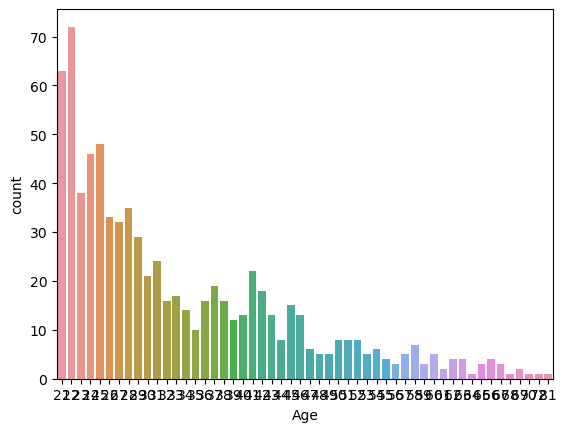

In [11]:
sns.countplot(data['Age'])
plt.show()

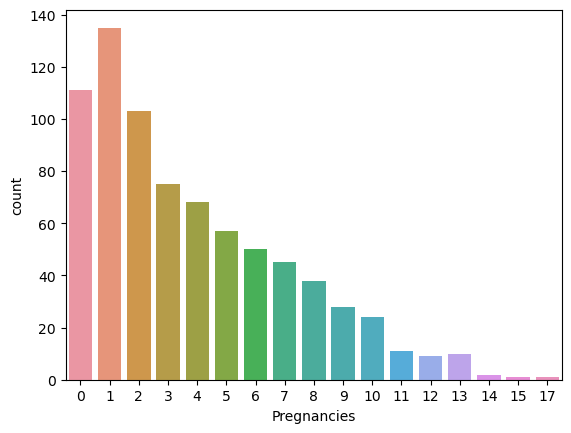

In [12]:
sns.countplot(data['Pregnancies'])
plt.show()

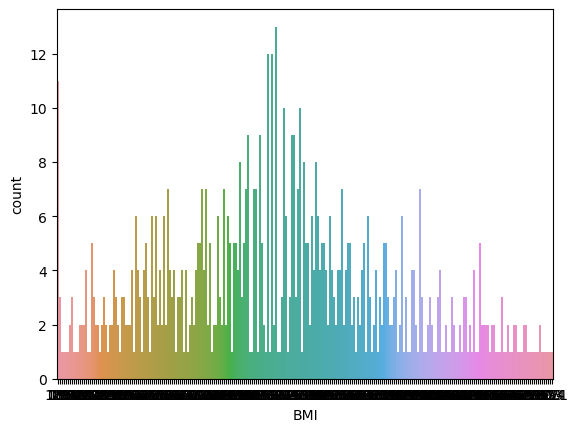

In [13]:
sns.countplot(data['BMI'])
plt.show()

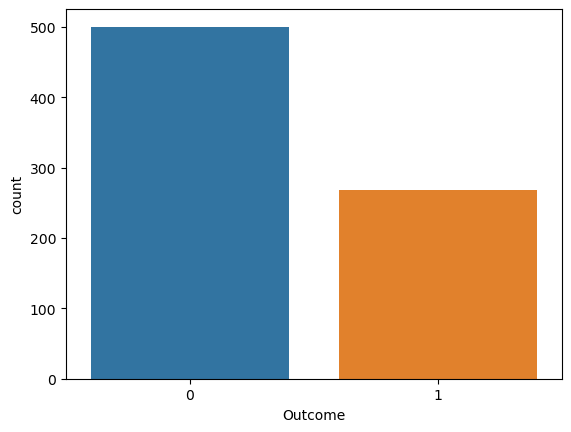

In [14]:
sns.countplot(data['Outcome'])
plt.show()

# Distplot:

<AxesSubplot:xlabel='Outcome', ylabel='Density'>

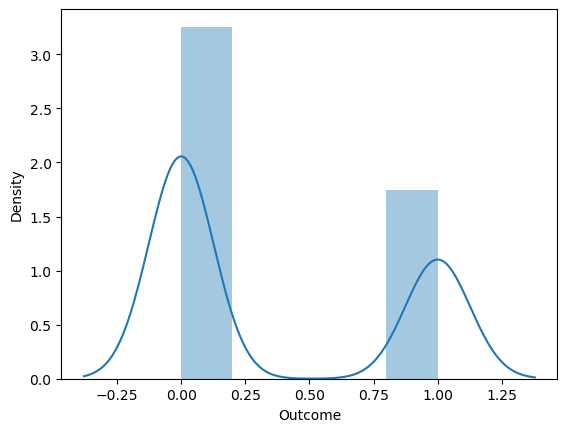

In [15]:
sns.distplot(data['Outcome'])

<AxesSubplot:xlabel='BMI', ylabel='Density'>

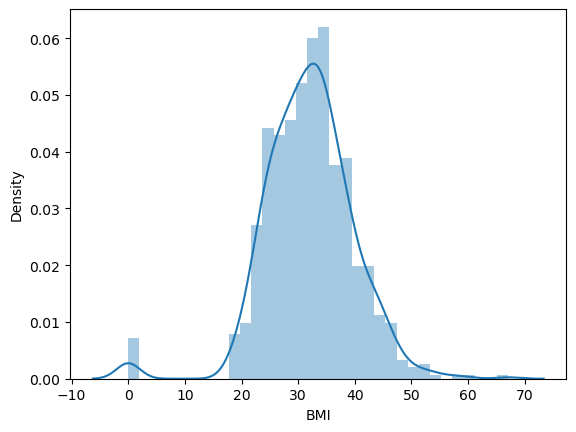

In [16]:
sns.distplot(data['BMI'])

<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

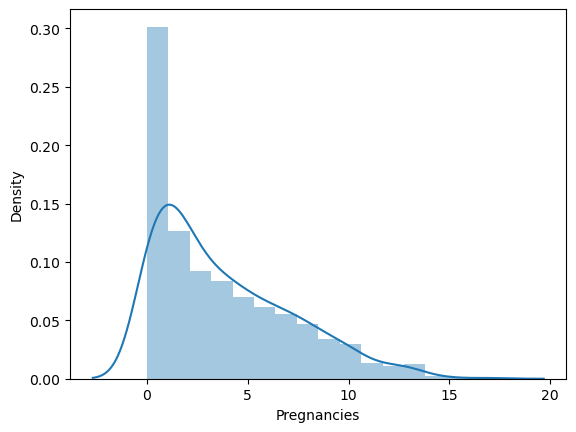

In [17]:
sns.distplot(data['Pregnancies'])

<AxesSubplot:xlabel='Age', ylabel='Density'>

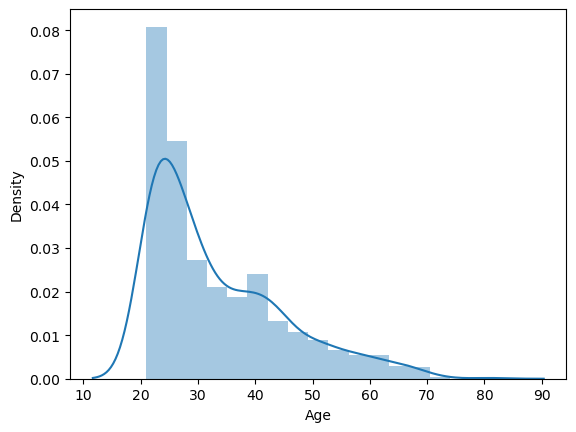

In [18]:
sns.distplot(data['Age'])

<AxesSubplot:xlabel='BloodPressure', ylabel='Density'>

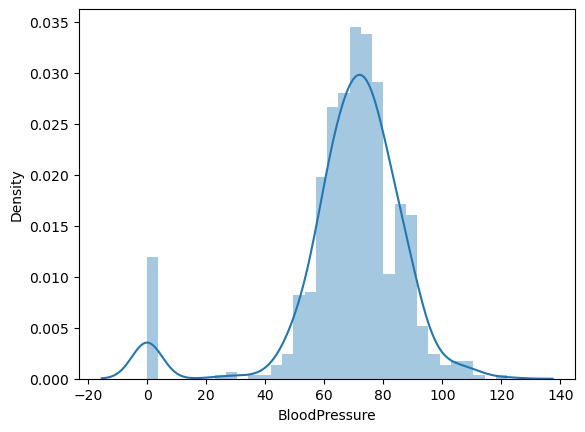

In [19]:
sns.distplot(data['BloodPressure'])

<AxesSubplot:xlabel='SkinThickness', ylabel='Density'>

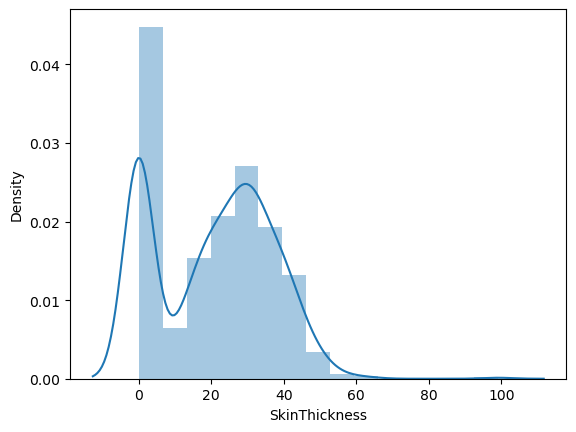

In [20]:
sns.distplot(data['SkinThickness'])

Pregnancies                    AxesSubplot(0.125,0.712609;0.168478x0.167391)
Glucose                     AxesSubplot(0.327174,0.712609;0.168478x0.167391)
BloodPressure               AxesSubplot(0.529348,0.712609;0.168478x0.167391)
SkinThickness               AxesSubplot(0.731522,0.712609;0.168478x0.167391)
Insulin                        AxesSubplot(0.125,0.511739;0.168478x0.167391)
BMI                         AxesSubplot(0.327174,0.511739;0.168478x0.167391)
DiabetesPedigreeFunction    AxesSubplot(0.529348,0.511739;0.168478x0.167391)
Age                         AxesSubplot(0.731522,0.511739;0.168478x0.167391)
Outcome                         AxesSubplot(0.125,0.31087;0.168478x0.167391)
dtype: object

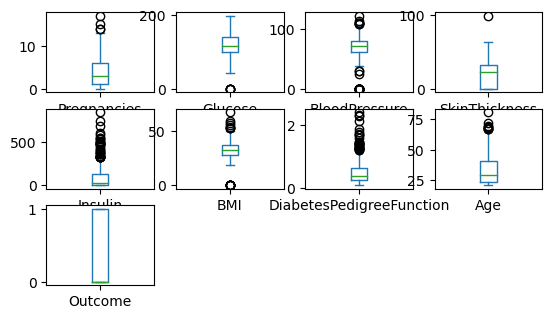

In [21]:
data.plot(kind ='box',subplots = True, layout =(4,4),sharex = False)

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

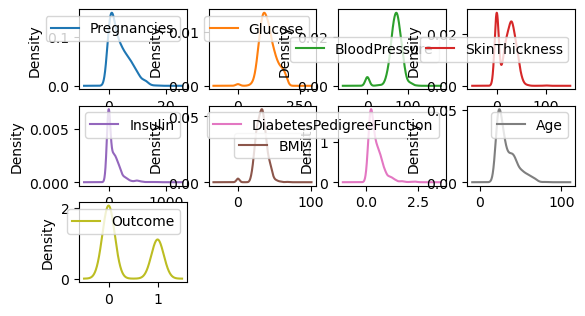

In [22]:
data.plot(kind ='density',subplots = True, layout =(4,4),sharex = False)

# Histogram

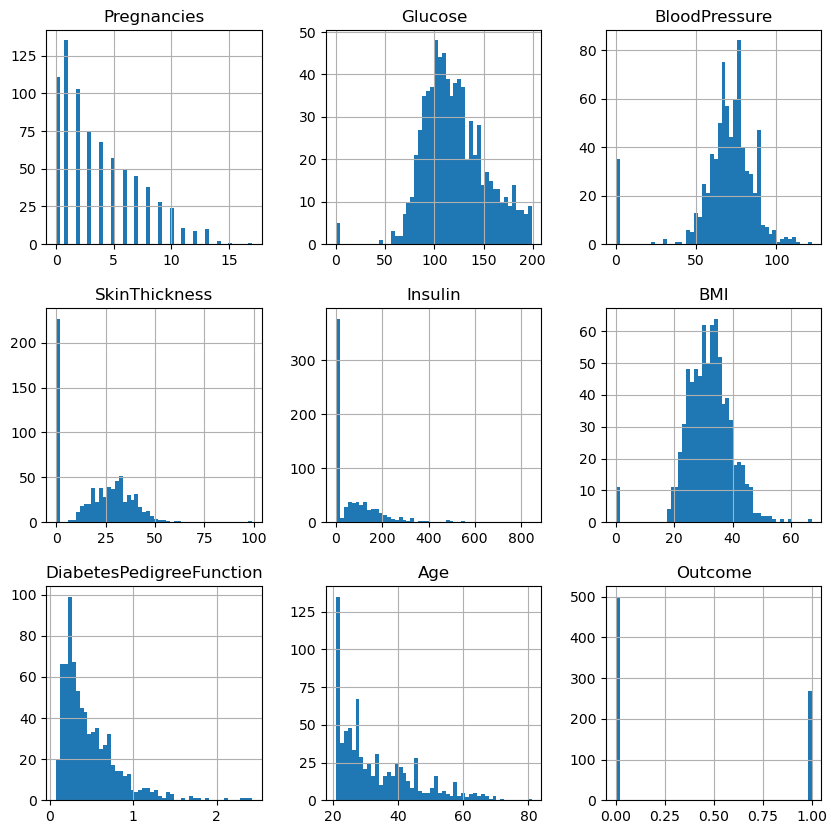

In [23]:
data.hist(figsize=(10,10),bins=50)
plt.show()

# Heatmap for expressing correlation

<AxesSubplot:>

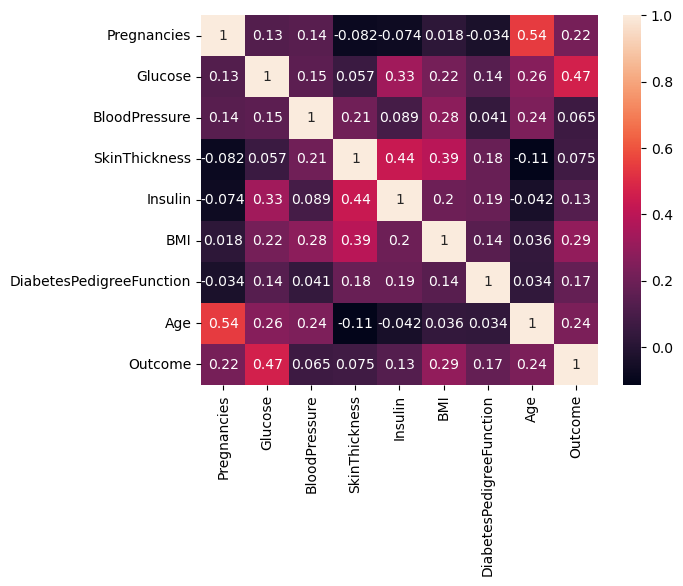

In [24]:
corr = data.corr()
sns.heatmap(corr,annot=True)

# Box plot for outlier visualization

<AxesSubplot:>

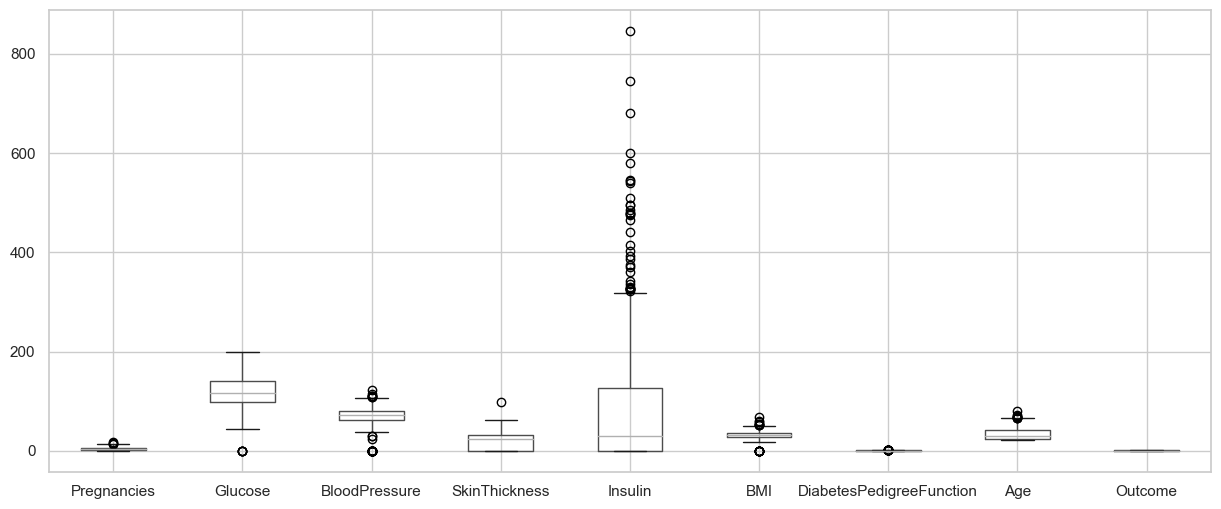

In [25]:
sns.set(style="whitegrid")
data.boxplot(figsize=(15,6))

# Pairplot:

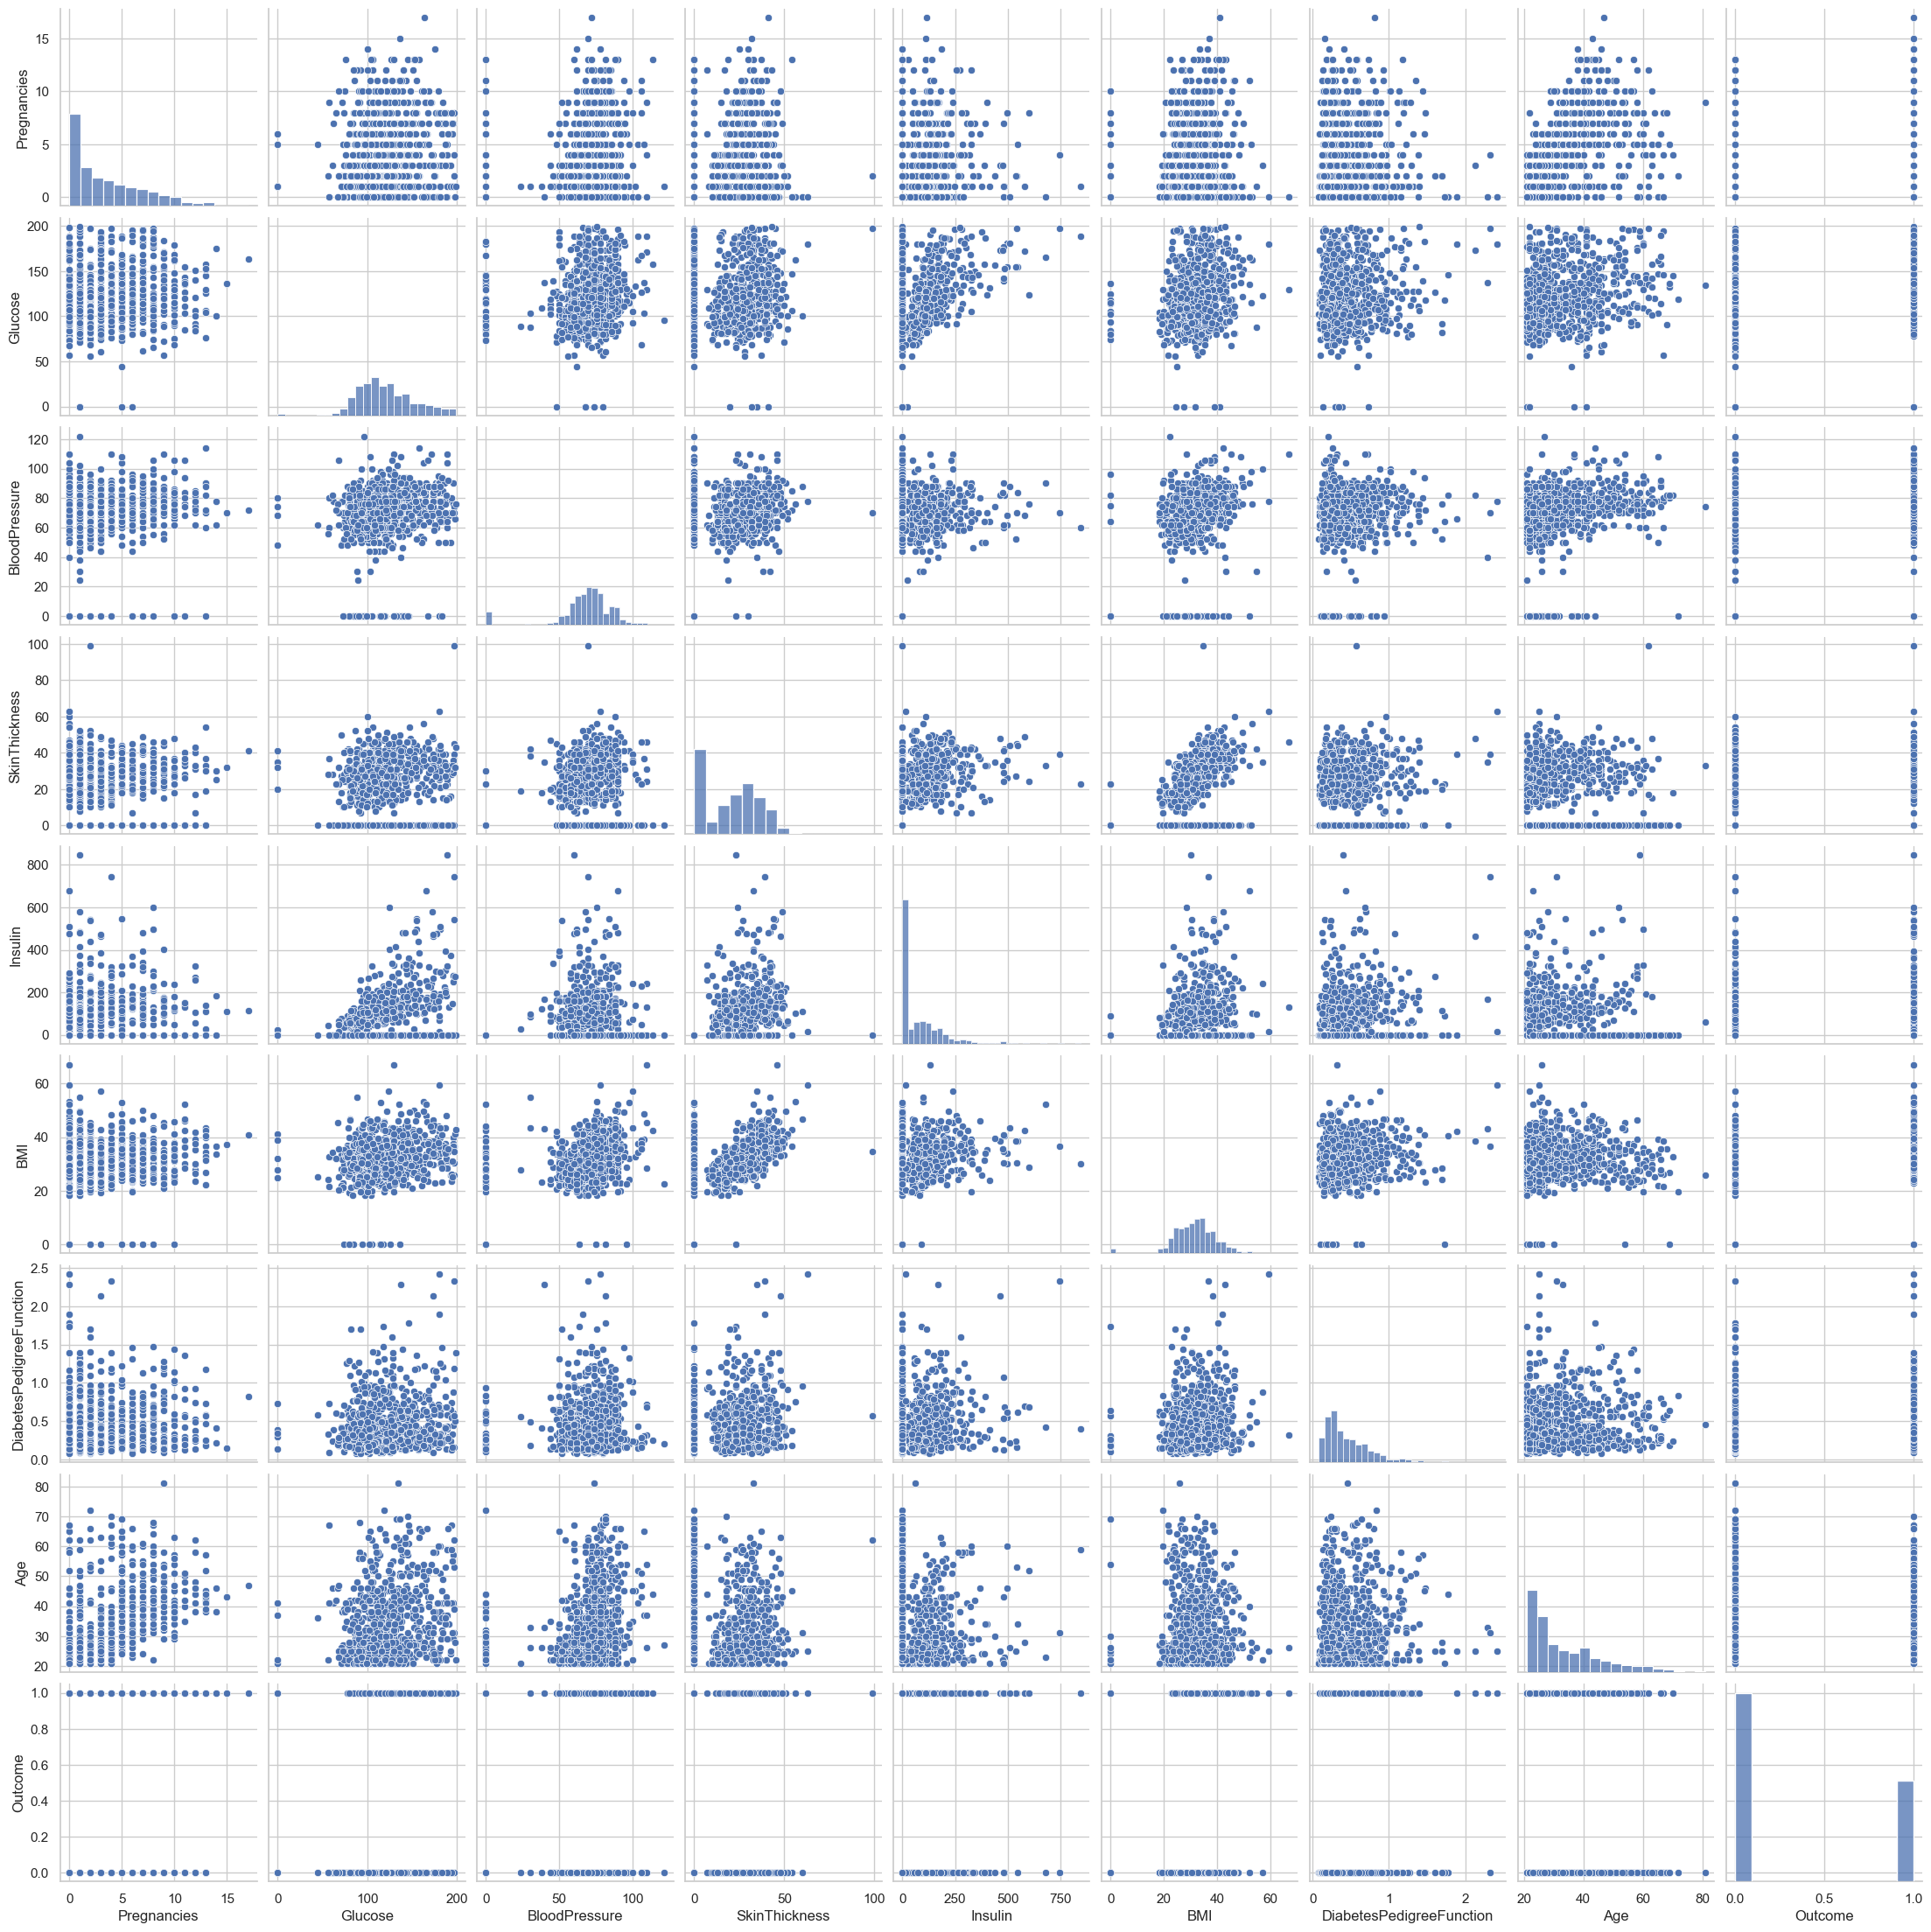

In [26]:
sns.pairplot(data)

# Violinplot:

<AxesSubplot:xlabel='Outcome', ylabel='Age'>

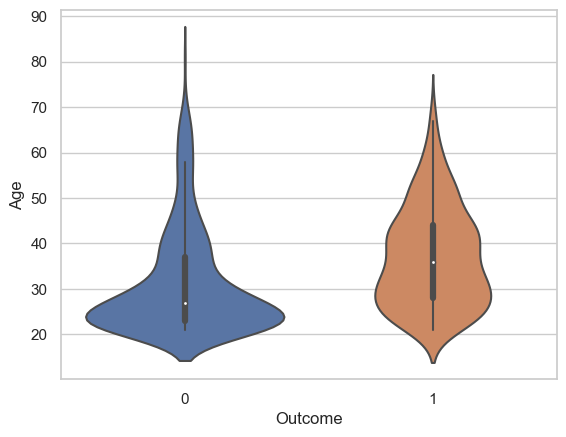

In [27]:
sns.violinplot(x='Outcome', y='Age', data=data)

<AxesSubplot:xlabel='Outcome', ylabel='BloodPressure'>

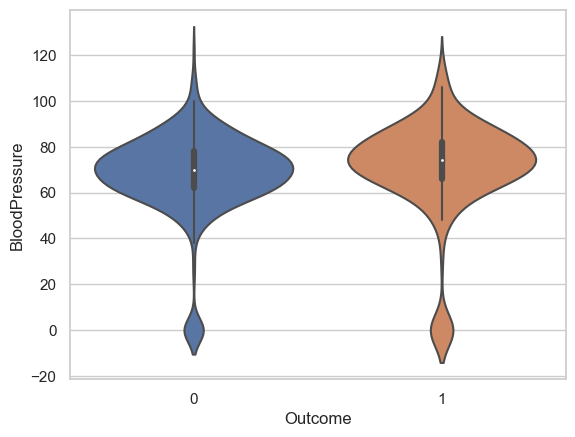

In [28]:
sns.violinplot(x='Outcome', y='BloodPressure', data=data)

<AxesSubplot:xlabel='Outcome', ylabel='SkinThickness'>

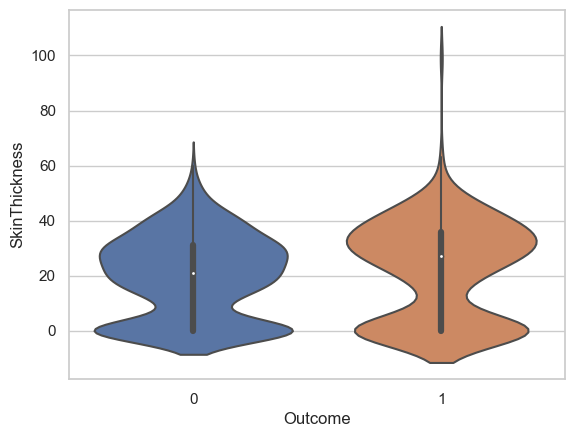

In [29]:
sns.violinplot(x='Outcome', y='SkinThickness', data=data)

# Pairplot:

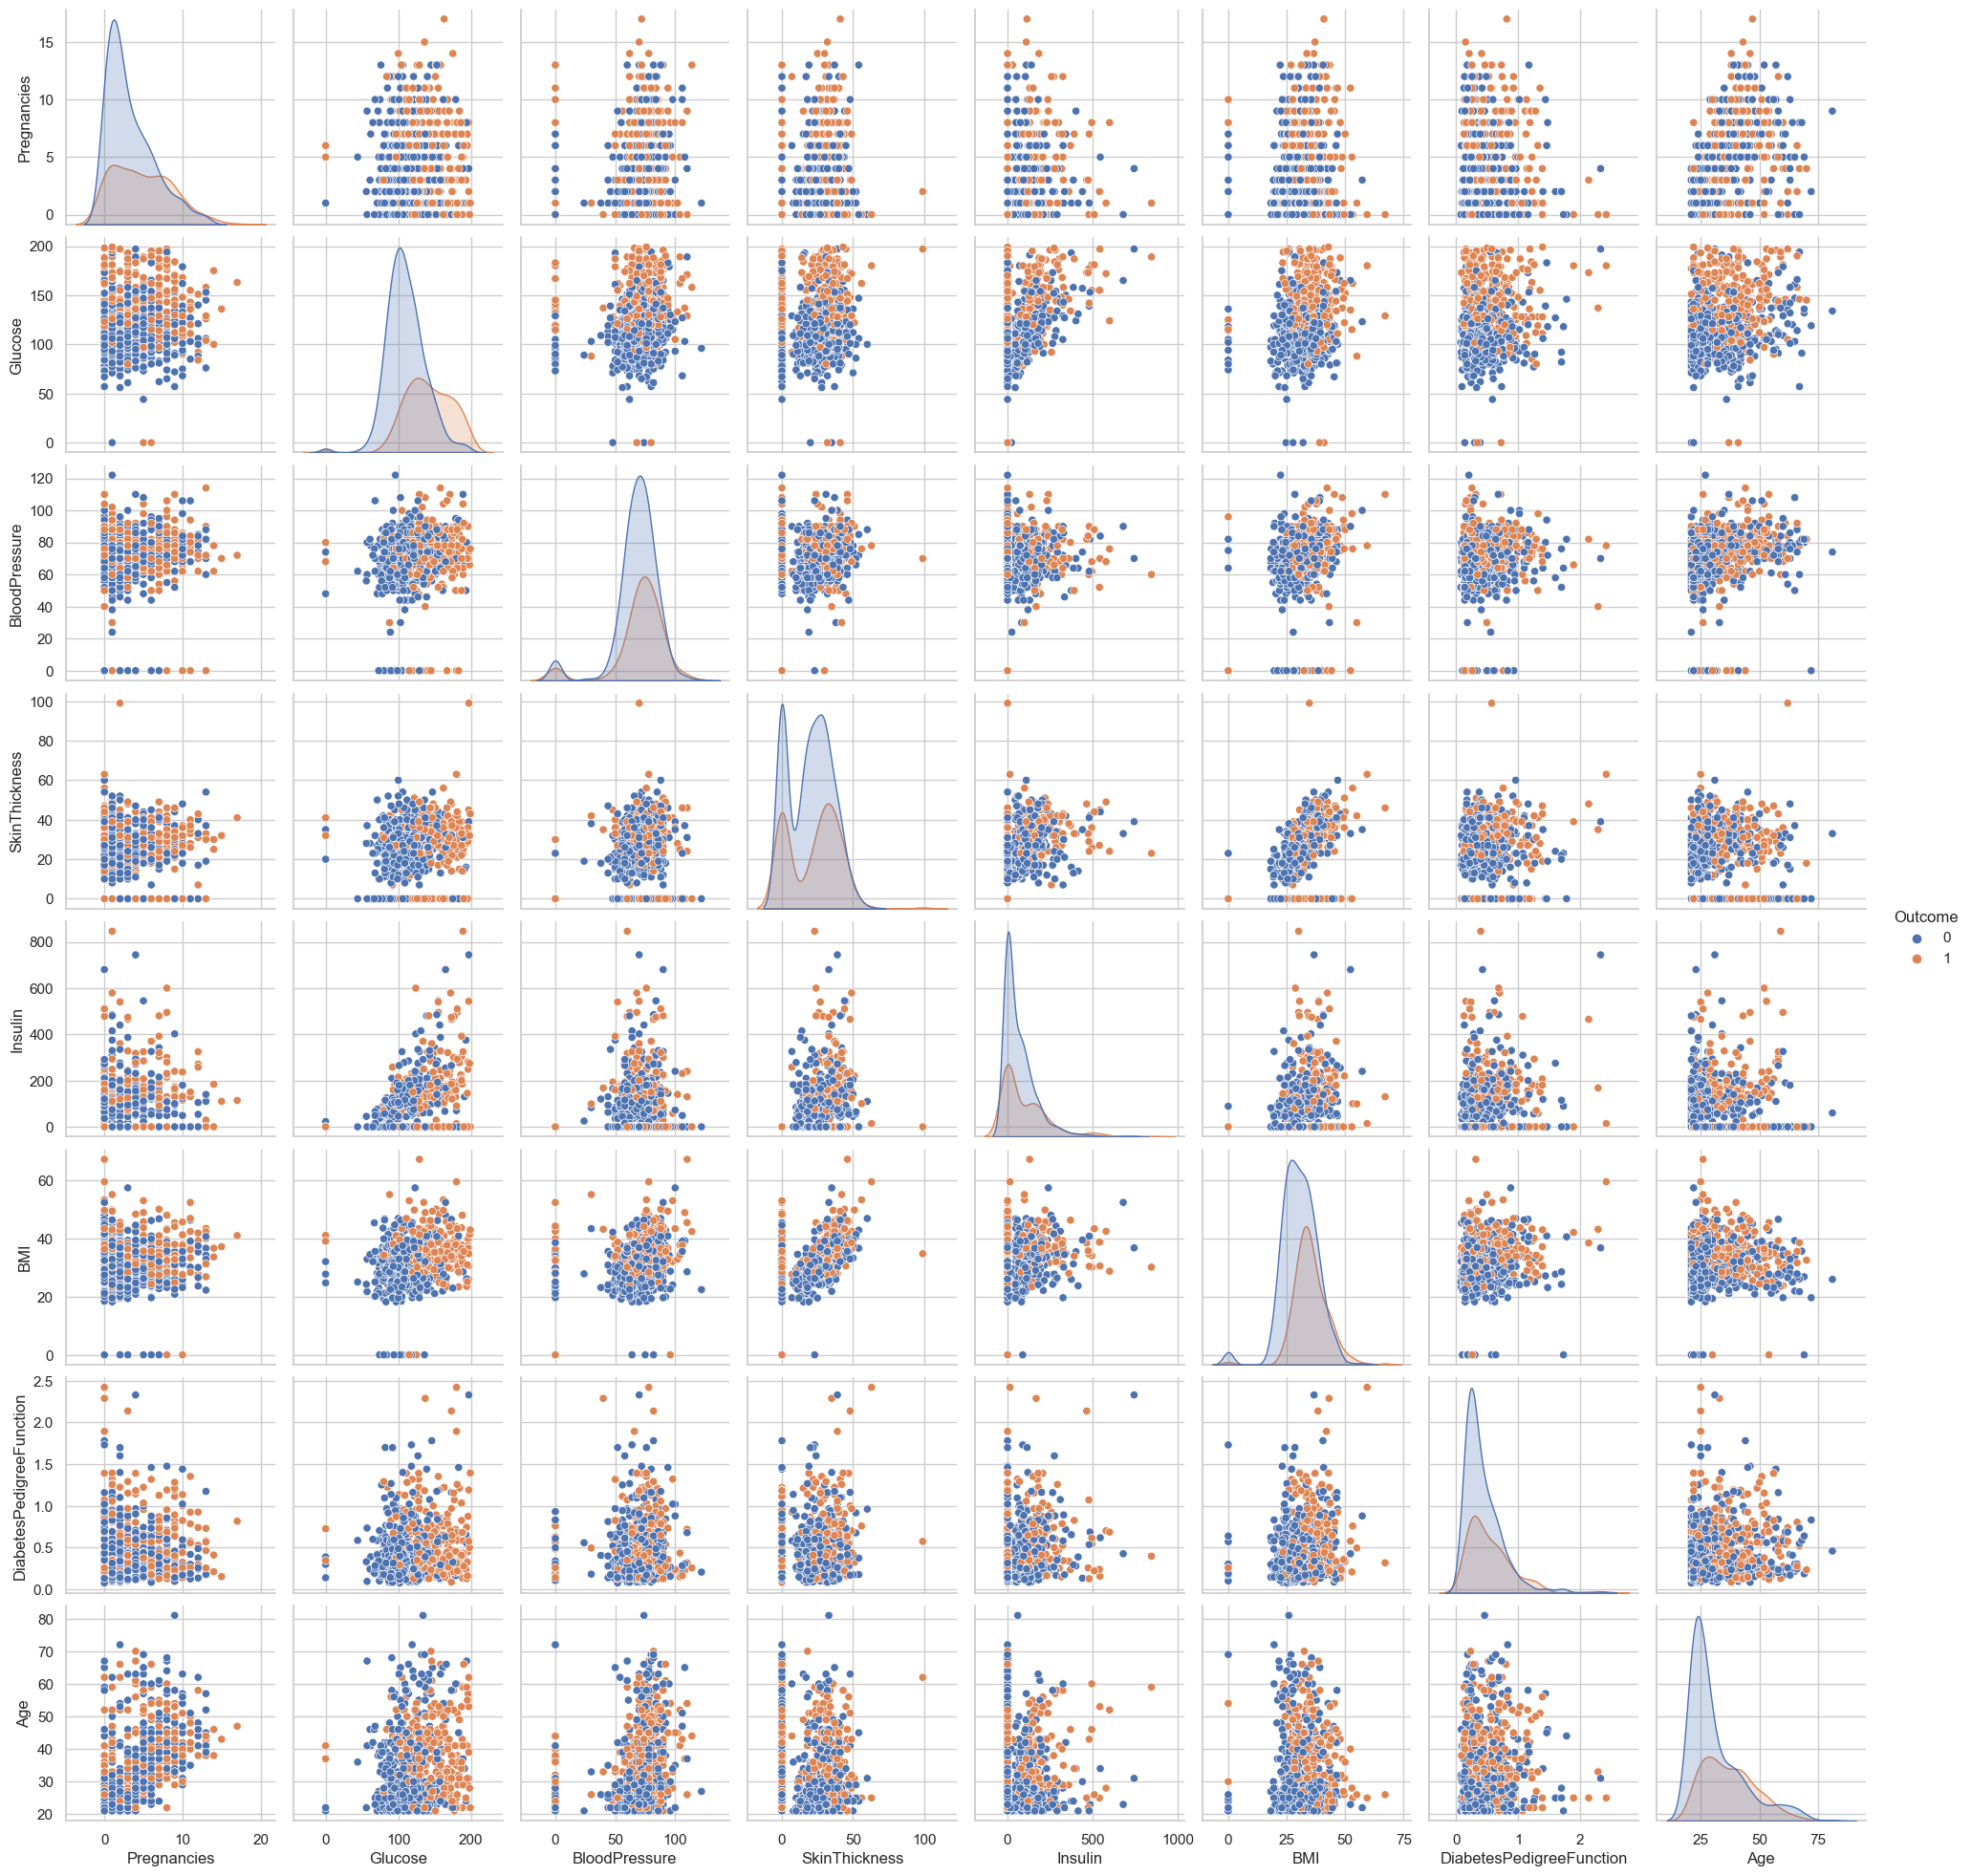

In [30]:
sns.pairplot(data,hue='Outcome');

# Feature Selection

In [31]:
#lets extract features and targets
X = data.drop(columns=['Outcome'])
Y = data['Outcome']
print("Features Extraction Sucessfull")

Features Extraction Sucessfull


# Feature Importance

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

from sklearn.ensemble import ExtraTreesClassifier
classifiern = ExtraTreesClassifier()
classifiern.fit(X,Y)
score = classifiern.feature_importances_
print(score)

[0.11043337 0.23947331 0.10196162 0.07650351 0.07589899 0.14294566
 0.11398483 0.1387987 ]


# Splitting Dataset

In [33]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2)

# Using Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,Y_train)
Y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score,confusion_matrix
print("Accuracy Score:",accuracy_score(Y_test,Y_pred))

Accuracy Score: 0.7727272727272727


In [35]:
confusion_mat = confusion_matrix(Y_test,Y_pred)
print(confusion_mat)

[[90 10]
 [25 29]]


# Using KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.7077922077922078


# Using SVC

In [37]:
from sklearn.svm import SVC
model = SVC()
model.fit(X_train,Y_train)
pred_y = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,pred_y))

Accuracy Score: 0.7532467532467533


# Using Decision Tree

In [38]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy',random_state=7)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred))

Accuracy Score: 0.7272727272727273


# Using GaussianNB

In [39]:
from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(X_train,Y_train)
y_pred3 = model3.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred3))

Accuracy Score: 0.7727272727272727


# Random Forest

In [40]:
from sklearn.ensemble import RandomForestClassifier
model2 = RandomForestClassifier(random_state=1)
model2.fit(X_train, Y_train)
y_pred2 = model2.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred2))

Accuracy Score: 0.7662337662337663


# Using Xgboost

In [41]:
import xgboost as xgb
model5 = xgb.XGBClassifier(random_state=1)
model5.fit(X_train, Y_train)
y_pred5 = model5.predict(X_test)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(Y_test,y_pred5))

Accuracy Score: 0.7597402597402597


# Results

In [42]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','KNN', 'SVC','Decision Tree' ,'GaussianNB','Random Forest','Xgboost'],
    'Score': [0.779,0.720,0.733,0.681,0.733,0.753,0.740]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
print(result_df)

                     Model
Score                     
0.779  Logistic Regression
0.753        Random Forest
0.740              Xgboost
0.733                  SVC
0.733           GaussianNB
0.720                  KNN
0.681        Decision Tree


Hence I will use Logistic Regression algorithm for training my model.